In [1]:
import pandas as pd
import numpy as np 
import copy
from matplotlib import pyplot as plt
import seaborn as sns
from collections import *
import datetime

In [2]:
dc=pd.read_excel(r"C:\Users\Mark 1\amprd_df_strd.xlsx")
dc = dc.loc[:, ~dc.columns.str.contains('^Unnamed')]
dc.tail()

,date,original_val,mean_based,max_based,mean_max_based,max_mean_based,mean_last_based,last_mean_based,last_based,middle_based
175,2020-09-20,87395,92317,108833,97829,102701,92544,91950,92177,105124
176,2020-09-21,74493,90919,108833,97223,101776,86826,86395,82506,95726
177,2020-09-22,83361,89525,108833,96855,100597,73728,77101,63496,89309
178,2020-09-23,86703,88520,109510,96952,99986,82587,99986,93285,92177
179,2020-09-24,0,86513,108309,95417,98202,85476,91273,90179,82506


In [3]:
dce=pd.read_excel(r"C:\Users\Mark 1\amerrprd_df_strd.xlsx")
dce = dce.loc[:, ~dce.columns.str.contains('^Unnamed')]
errdf=dce=dce.loc[:,["date","mb","mxb","mxb","memb","mxmb","mlb","lmb","lb","mdb"]]
errdf.tail()

,date,mb,mxb,mxb,memb,mxmb,mlb,lmb,lb,mdb
175,2020-09-20,-4922,-21438,-21438,-10434,-15306,-5149,-4555,-4782,-17729
176,2020-09-21,-16426,-34340,-34340,-22730,-27283,-12333,-11902,-8013,-21233
177,2020-09-22,-6164,-25472,-25472,-13494,-17236,9633,6260,19865,-5948
178,2020-09-23,-1817,-22807,-22807,-10249,-13283,4116,-13283,-6582,-5474
179,2020-09-24,-86513,-108309,-108309,-95417,-98202,-85476,-91273,-90179,-82506


In [4]:
erdt=pd.read_excel(r"C:\Users\Mark 1\dcerr_df.xlsx")
erdt = erdt.loc[:, ~erdt.columns.str.contains('^Unnamed')]
erdt['original_val']=erdt['original_val'].astype('int')
erdt['date']=erdt['date'].astype('datetime64[ns]')
erdt.tail()

,date,mipe,mxne,mipv,mxnv,original_val,pprd_val,nprd_val
175,2020-09-20,No,lmb,No,-4555,87395,No,91950
176,2020-09-21,No,lb,No,-8013,74493,No,82506
177,2020-09-22,lmb,mdb,6260,-5948,83361,77101,89309
178,2020-09-23,mlb,mb,4116,-1817,86703,82587,88520
179,2020-09-24,No,mdb,No,-82506,0,No,82506


In [5]:
erdtpv=erdt[erdt['mipv']!='No']
erdtpv['mipe']=erdtpv['mipe'].astype('str')
erdtpv['mipv']=erdtpv['mipv'].astype('int')
erdtpv['pprd_val']=erdtpv['pprd_val'].astype('int')
erdtpv

<ipython-input-5-ba78fec52151>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtpv['mipe']=erdtpv['mipe'].astype('str')
<ipython-input-5-ba78fec52151>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtpv['mipv']=erdtpv['mipv'].astype('int')
<ipython-input-5-ba78fec52151>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,date,mipe,mxne,mipv,mxnv,original_val,pprd_val,nprd_val
0,2020-03-31,lb,mdb,18,-12,309,291,321
1,2020-04-01,memb,lb,23,-87,424,401,511
2,2020-04-02,mxmb,memb,66,-77,486,420,563
3,2020-04-03,lb,memb,3,-106,560,557,666
4,2020-04-04,mxmb,lb,54,-66,579,525,645
...,...,...,...,...,...,...,...,...
172,2020-09-17,mb,memb,2969,-1641,96792,93823,98433
173,2020-09-18,lmb,mb,524,-724,92788,92264,93512
174,2020-09-19,mlb,memb,224,-4820,92574,92350,97394
177,2020-09-22,lmb,mdb,6260,-5948,83361,77101,89309


In [6]:
erdtnv=erdt[erdt['mxnv']!='No']
erdtnv['mxne']=erdtnv['mxne'].astype('str')
erdtnv['mxnv']=erdtnv['mxnv'].astype('int')
erdtnv['nprd_val']=erdtnv['nprd_val'].astype('int')
erdtnv

<ipython-input-6-532af38dbbcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtnv['mxne']=erdtnv['mxne'].astype('str')
<ipython-input-6-532af38dbbcd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtnv['mxnv']=erdtnv['mxnv'].astype('int')
<ipython-input-6-532af38dbbcd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,date,mipe,mxne,mipv,mxnv,original_val,pprd_val,nprd_val
0,2020-03-31,lb,mdb,18,-12,309,291,321
1,2020-04-01,memb,lb,23,-87,424,401,511
2,2020-04-02,mxmb,memb,66,-77,486,420,563
3,2020-04-03,lb,memb,3,-106,560,557,666
4,2020-04-04,mxmb,lb,54,-66,579,525,645
...,...,...,...,...,...,...,...,...
175,2020-09-20,No,lmb,No,-4555,87395,No,91950
176,2020-09-21,No,lb,No,-8013,74493,No,82506
177,2020-09-22,lmb,mdb,6260,-5948,83361,77101,89309
178,2020-09-23,mlb,mb,4116,-1817,86703,82587,88520


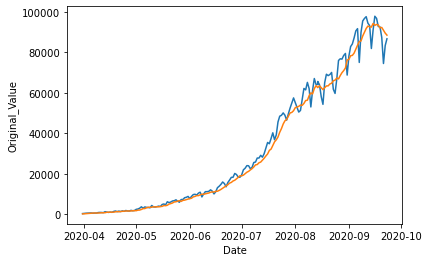

In [7]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['mean_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

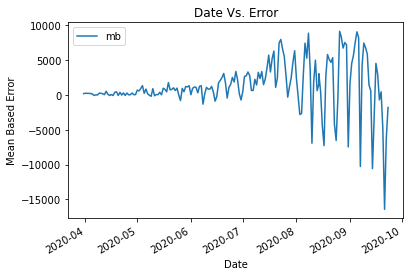

In [8]:
errdf[:len(errdf)-1].plot(x="date",y="mb")
plt.xlabel("Date")
plt.ylabel("Mean Based Error")
plt.title("Date Vs. Error")


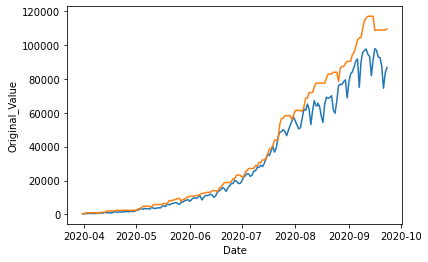

In [9]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['max_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

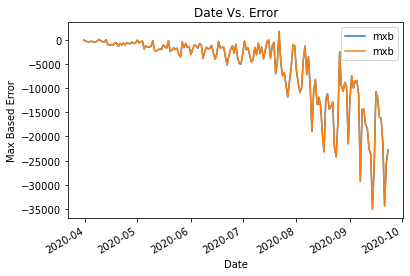

In [10]:
errdf[:len(errdf)-1].plot(x="date",y="mxb")
plt.xlabel("Date")
plt.ylabel("Max Based Error")
plt.title("Date Vs. Error")


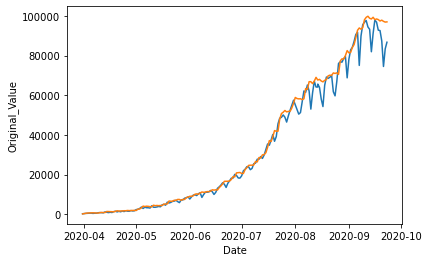

In [11]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['mean_max_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

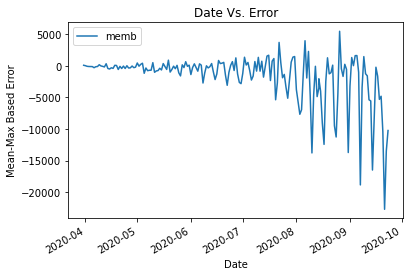

In [12]:
errdf[:len(errdf)-1].plot(x="date",y="memb")
plt.xlabel("Date")
plt.ylabel("Mean-Max Based Error")
plt.title("Date Vs. Error")


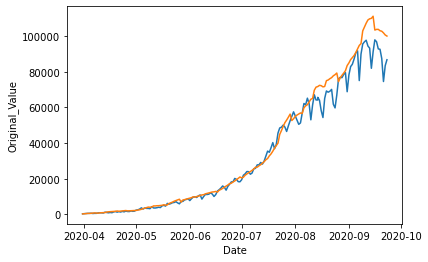

In [13]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['max_mean_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

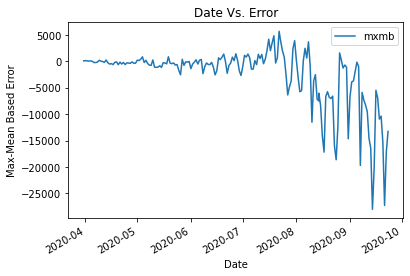

In [14]:
errdf[:len(errdf)-1].plot(x="date",y="mxmb")
plt.xlabel("Date")
plt.ylabel("Max-Mean Based Error")
plt.title("Date Vs. Error")


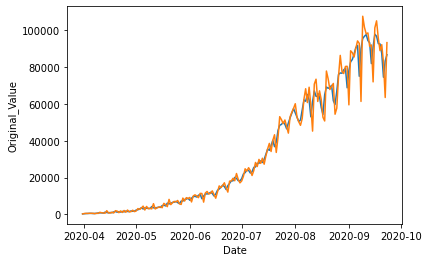

In [15]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['last_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

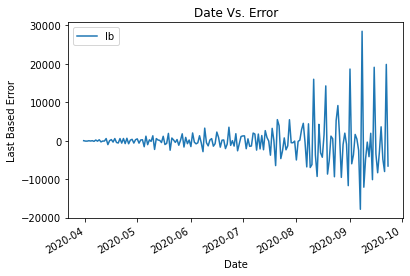

In [16]:
errdf[:len(errdf)-1].plot(x="date",y="lb")
plt.xlabel("Date")
plt.ylabel("Last Based Error")
plt.title("Date Vs. Error")


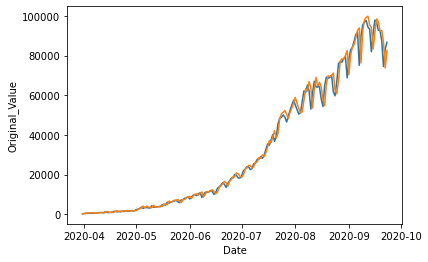

In [17]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['mean_last_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

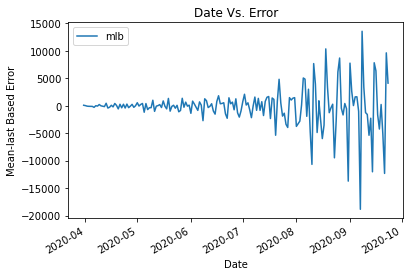

In [18]:
errdf[:len(errdf)-1].plot(x="date",y="mlb")
plt.xlabel("Date")
plt.ylabel("Mean-last Based Error")
plt.title("Date Vs. Error")


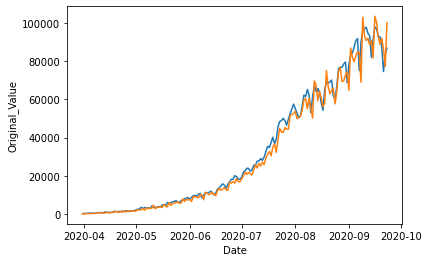

In [19]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['last_mean_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

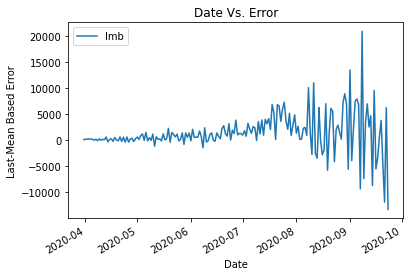

In [20]:
errdf[:len(errdf)-1].plot(x="date",y="lmb")
plt.xlabel("Date")
plt.ylabel("Last-Mean Based Error")
plt.title("Date Vs. Error")


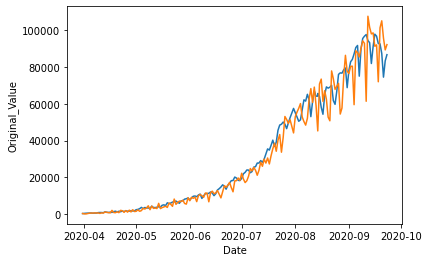

In [21]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['middle_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

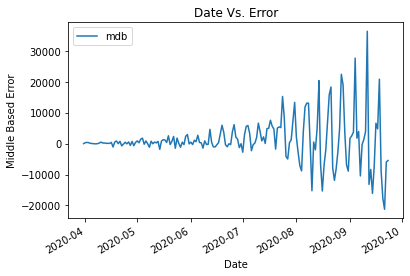

In [22]:
errdf[:len(errdf)-1].plot(x="date",y="mdb")
plt.xlabel("Date")
plt.ylabel("Middle Based Error")
plt.title("Date Vs. Error")


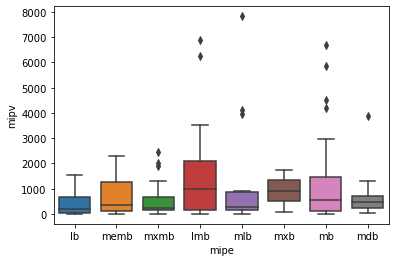

In [23]:
sns.boxplot(x='mipe',y='mipv',data=erdtpv,width=0.75)


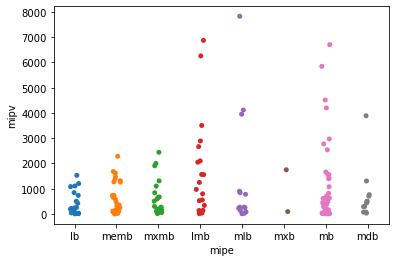

In [24]:
sns.stripplot(x='mipe',y='mipv',data=erdtpv,jitter=True)

In [25]:
Counter(erdt['mipe'])

Counter({'lb': 22,
         'memb': 28,
         'mxmb': 26,
         'lmb': 21,
         'mlb': 14,
         'No': 15,
         'mxb': 2,
         'mb': 40,
         'mdb': 12})

In [26]:
mnval=max(list(Counter(erdt['mipe']).values()))
mnvalidx=list(Counter(erdt['mipe']).values()).index(mnval)
mnkys=list(Counter(erdt['mipe']).keys())[mnvalidx]
print("method: "+mnkys+" and values is: ",Counter(erdt['mipe'])[mnkys])

method: mb and values is:  40


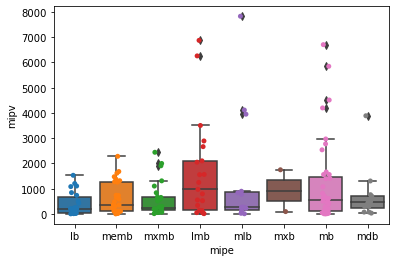

In [27]:
sns.boxplot(x='mipe',y='mipv',data=erdtpv)

sns.stripplot(x='mipe',y='mipv',data=erdtpv,jitter=True)

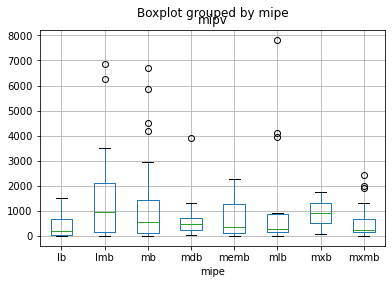

In [28]:
erdtpv.boxplot(by='mipe', column=['mipv'], grid=True)

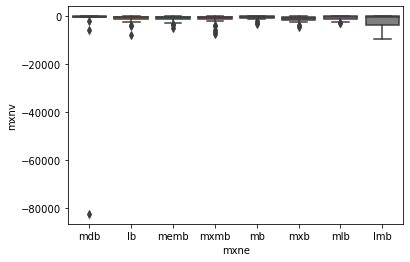

In [29]:
sns.boxplot(x='mxne',y='mxnv',data=erdtnv)

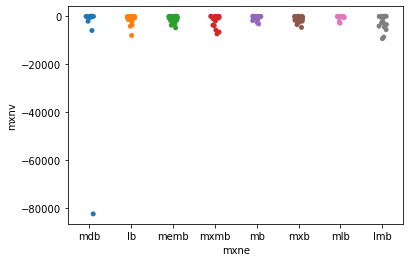

In [30]:
sns.stripplot(x='mxne',y='mxnv',data=erdtnv,jitter=True)

In [31]:
Counter(erdt['mxne'])

Counter({'mdb': 16,
         'lb': 18,
         'memb': 42,
         'mxmb': 26,
         'mb': 19,
         'No': 2,
         'mxb': 26,
         'mlb': 12,
         'lmb': 19})

In [32]:
mxval=max(list(Counter(erdt['mxne']).values()))
mxvalidx=list(Counter(erdt['mxne']).values()).index(mxval)
mxkys=list(Counter(erdt['mxne']).keys())[mxvalidx]
print("method: "+mxkys+" and values is: ",Counter(erdt['mxne'])[mxkys])

method: memb and values is:  42


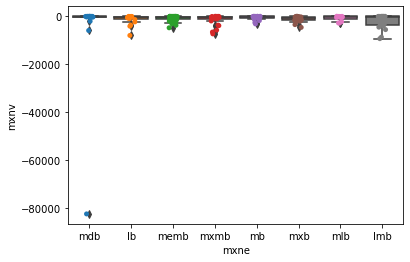

In [33]:
sns.boxplot(x='mxne',y='mxnv',data=erdtnv)
sns.stripplot(x='mxne',y='mxnv',data=erdtnv,jitter=True)

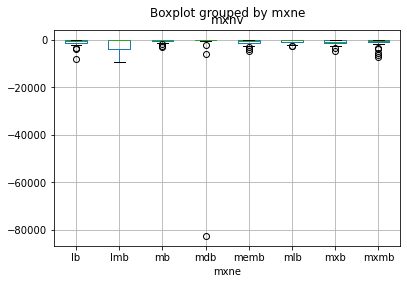

In [34]:
erdtnv.boxplot(by='mxne', column=['mxnv'], grid=True)